Problem 1: finite diference of y(x)=sin(x)

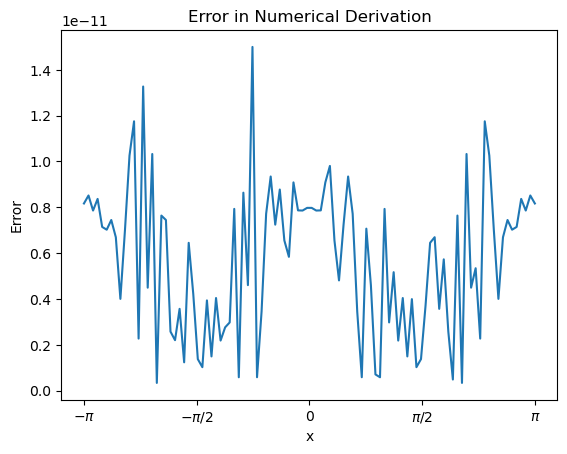

In [2]:
""" This is the main script for problem 1 for the "Numerical Derivatives" homework. In 
this problem we use the centered two-point formula to solve for the derivative of 
y(x) = sin(x). We will then plot the error over one period at 100 points and try to
optimize our step size h to minimize the error. """

import numpy as np
import matplotlib.pyplot as plt
import sys
import math


# Define functions
def y(x):
    return np.sin(x)


def y_prime(x, h, y):
    derivatives = []
    for x_i in x:
        temp = h
        temp = x_i + temp
        h = temp - x_i
        y_prime_point = (y(x_i + h) - y(x_i - h)) / (2 * h)
        derivatives.append(y_prime_point)
    return derivatives


# Initialize everything
x = np.linspace(-np.pi, np.pi, 100, endpoint=True)
h = 7 * 10**-6
derivatives = []
error = []

# Calculate the optimal value of h
epsilon = sys.float_info.epsilon  # grab the machine epsilon
xc = abs(
    -1
)  # analyicatlly y/y'' is -1 for sin(x) and -1^(1/3), taken as the real value, is -1
h1 = (epsilon ** (1.0 / 3.0)) * xc
""" This value for h was calculated using the method in 5.7 of NR, however, through trial and error
I have found that the value of h above gives a much lower error. You guys can look over this 
calculation if you want. """

# Implement the two-point formula
derivatives = y_prime(x, h, y)

# Calculate error
for i in range(len(x)):
    point_error = abs(derivatives[i] - np.cos(x[i]))
    error.append(point_error)

# Plot error
plt.plot(x, error)
plt.xticks(
    np.arange(-np.pi, np.pi + 0.01, np.pi / 2),
    [r"$-\pi$", r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"],
)
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error in Numerical Derivation")
plt.show()

In [3]:
derivs = y_prime(x, h1, y)
error1 = []
for i in range(len(x)):
    point_error = abs(derivs[i] - np.cos(x[i]))
    error1.append(point_error)
derivs2 = y_prime(x, h, y)
error2 = []
for i in range(len(x)):
    point_error = abs(derivs2[i] - np.cos(x[i]))
    error2.append(point_error)
rmse = np.sqrt(np.mean(np.square(error1)))
rmse2 = np.sqrt(np.mean(np.square(error2)))
print(f"RMSE for h = {h1} is {rmse}")
print(f"RMSE for h = {h} is {rmse2}")


def test_h(h):
    derivs = y_prime(x, h, y)
    error = []
    for i in range(len(x)):
        point_error = abs(derivs[i] - np.cos(x[i]))
        error.append(point_error)
    return error


hs = np.linspace(h1 * 10e-2, h1 * 10e2, 100000)
rmse = []
for h in hs:
    rmse.append(np.sqrt(np.mean(np.square(test_h(h)))))
best_h = hs[np.argmin(rmse)]
print(f"Best h is {best_h}")
print(f"RMSE for best h is {np.min(rmse)}")

RMSE for h = 6.055454452393343e-06 is 5.0840384320593404e-12
RMSE for h = 7e-06 is 6.611910599415104e-12
Best h is 4.722883875348346e-06
RMSE for best h is 4.111846107663549e-12


Problem 2:
test the several functions, timing them and comparing accuracy

In [30]:
def f1(x):
    return np.sin(x)


x1 = np.linspace(-np.pi, np.pi, 100, endpoint=True)


def f2(x):
    return np.sin(1 / x)


x2 = np.linspace(-1, 1, 100, endpoint=True)


def f3(x):
    return 3 * (x**2) + (1 / np.pi) ** 2 * np.log((np.pi - x) ** 2)


x3 = np.linspace(3.13, 3.16, 100, endpoint=True)


def f4(x):
    temp = x
    for i in range(100):
        temp = np.sin(temp)
    return temp


x4 = np.linspace(-1, 1, 100, endpoint=True)


def f5(x):
    ys = []
    for x_i in x:
        ys.append(f5_helper(x_i))
    return ys


def f5_helper(x):
    A = np.array([[1, x], [2, x**2]])
    b = np.array([[1], [1]])
    y = np.linalg.solve(A, b)
    return 1 / np.linalg.norm(y)


def alt_f5(x):
    y1 = alt_f5_y1(x)
    y2 = alt_f5_y2(x)
    return 1 / np.sqrt(y1**2 + y2**2)


def alt_f5_y1(x):
    return (x - 1) / (x - 2)


def alt_f5_y2(x):
    return -1 / ((x - 2) * x)


x5 = np.linspace(-3, 3, 100, endpoint=True)

Function: sin(x)


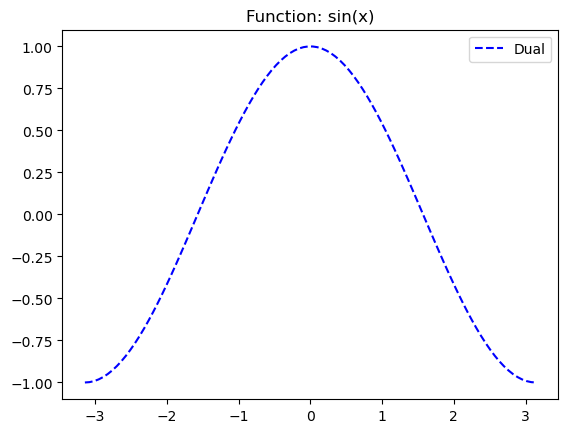

Time for Dual: 0.0

Function: sin(1/x)


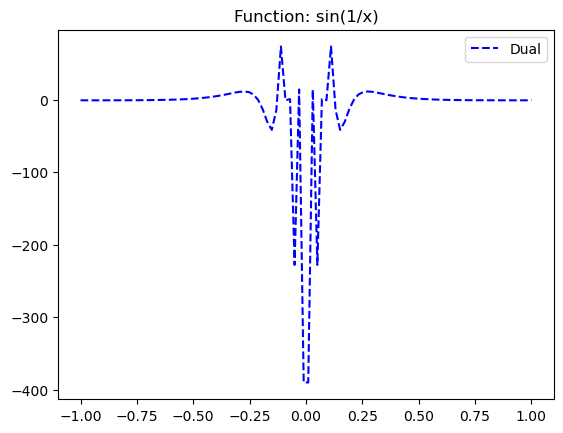

Time for Dual: 0.0

Function: 3x^2 + (1/pi)^2 * ln((pi-x)^2)


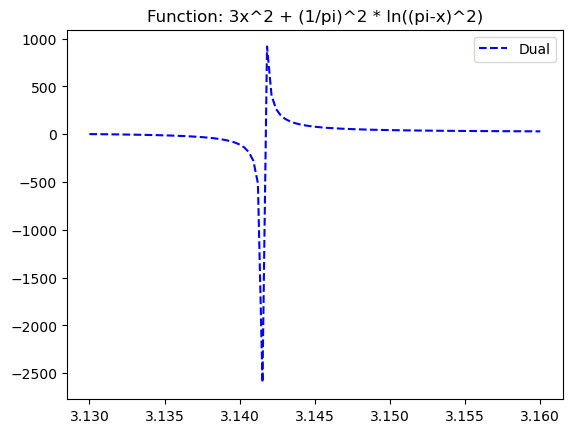

Time for Dual: 0.0

Function: sin(sin(...))


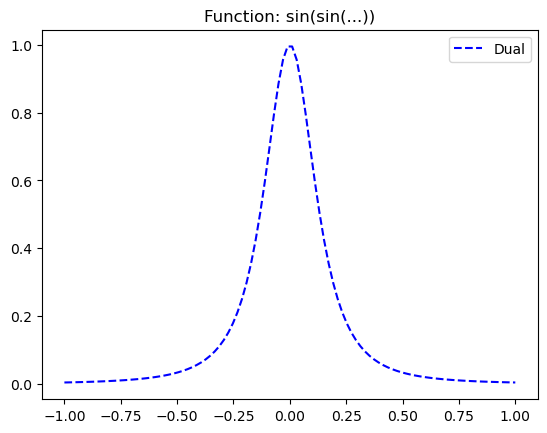

Time for Dual: 0.0040302276611328125

Function: matrix


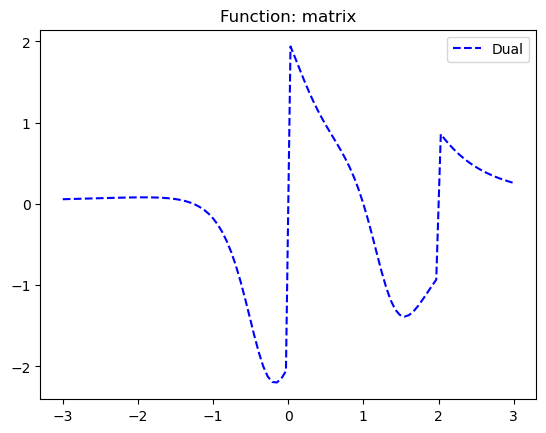

Time for Dual: 0.0



In [34]:
methods = ["Dual"]  # add your methods here
import time
from interface import derivative
import matplotlib.pyplot as plt

for f, x, name in zip(
    [f1, f2, f3, f4, f5],
    [x1, x2, x3, x4, x5],
    ["sin(x)", "sin(1/x)", "3x^2 + (1/pi)^2 * ln((pi-x)^2)", "sin(sin(...))", "matrix"],
):
    times = []
    derivs = []
    for method in methods:
        if name == "matrix" and method == "Dual":
            start = time.time()
            deriv = derivative(alt_f5, x, method)
            end = time.time()
            times.append(end - start)
            derivs.append(deriv)
        else:
            start = time.time()
            deriv = derivative(f, x, method)
            end = time.time()
            times.append(end - start)
            derivs.append(deriv)
    print(f"Function: {name}")
    plt.figure()
    plt.plot(x, derivs[0], "b--", label=methods[0])
    # plt.plot(x, derivs[1], 'r--', label=methods[1])
    # plt.plot(x, derivs[2], 'g--', label=methods[2])
    plt.title(f"Function: {name}")
    plt.legend()
    plt.show()
    print(f"Time for {methods[0]}: {times[0]}")
    # print(f'Time for {methods[1]}: {times[1]}')
    # print(f'Time for {methods[2]}: {times[2]}')

    print()